<a href="https://colab.research.google.com/github/winarsibidul03/Analisis-Regresi/blob/main/Tugas_Analisis_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TUGAS ANALISIS REGRESI 
**NAMA : WINARSI J. BIDUL**

**NIM : 2000015011**


##Pengklasifikasian Decision Tree di Scikit-Learn

###Import Library

Pertama-tama import library yang diperlukan.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

###Menginput data "Diabetes"
Upload dataset  Diabetes yang diperlukan menggunakan fungsi baca CSV.


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("https://github.com/winarsibidul03/psds_3.0/raw/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###Seleksi fitur
Yaitu membagi kolom yang diberikan menjadi dua jenis variabel dependen (atau variabel target) dan variabel independen (atau variabel fitur).

In [ ]:
features = ['Age','Pregnancies', 'Glucose', 'BloodPressure','Insulin','DiabetesPedigreeFunction','BMI']
X = df[features]
y = df['Outcome']
print(X)
print(y)

     Age  Pregnancies  Glucose  BloodPressure  Insulin  \
0     50            6      148             72        0   
1     31            1       85             66        0   
2     32            8      183             64        0   
3     21            1       89             66       94   
4     33            0      137             40      168   
..   ...          ...      ...            ...      ...   
763   63           10      101             76      180   
764   27            2      122             70        0   
765   30            5      121             72      112   
766   47            1      126             60        0   
767   23            1       93             70        0   

     DiabetesPedigreeFunction   BMI  
0                       0.627  33.6  
1                       0.351  26.6  
2                       0.672  23.3  
3                       0.167  28.1  
4                       2.288  43.1  
..                        ...   ...  
763                     0.171  32.9  

###Memisahkan data
Untuk memahami performa model, membagi dataset menjadi set Training dan set pengujian adalah strategi yang baik.
Pisahkan dataset dengan menggunakan fungsi train_test_split(). dengan melewati 3 fitur parameter, target, dan ukuran test_set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training dan 30% test

###Membangun Decision Tree
Membuat model Decision Tree dengan menggunakan Scikit-learn.

In [ ]:
#Membuat Objek Decision Tree classifer 
clf = DecisionTreeClassifier()

# Pengklasifikasi Decision Tree 
clf = clf.fit(X_train,y_train)

#Predict respon untuk test dataset
y_pred = clf.predict(X_test)

###Mengevaluasi Model 
Perkirakan seberapa akurat pengklasifikasi atau model dapat memprediksi jenis kultivar.

Akurasi dapat dihitung dengan membandingkan nilai set tes aktual dan nilai prediksi.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


###Visualisasi Decision Tree
Dengan menggunakan fungsi export_graphviz Scikit-learn untuk menampilkan pohon di dalam notebook Jupyter. Untuk merencanakan pohon, perlu menginstal graphviz dan pydotplus.

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fungsi export_graphviz mengubah pengklasifikasi pohon keputusan menjadi file dot dan pydotplus mengonversi file titik ini menjadi png atau formulir yang dapat ditampilkan di Jupyter

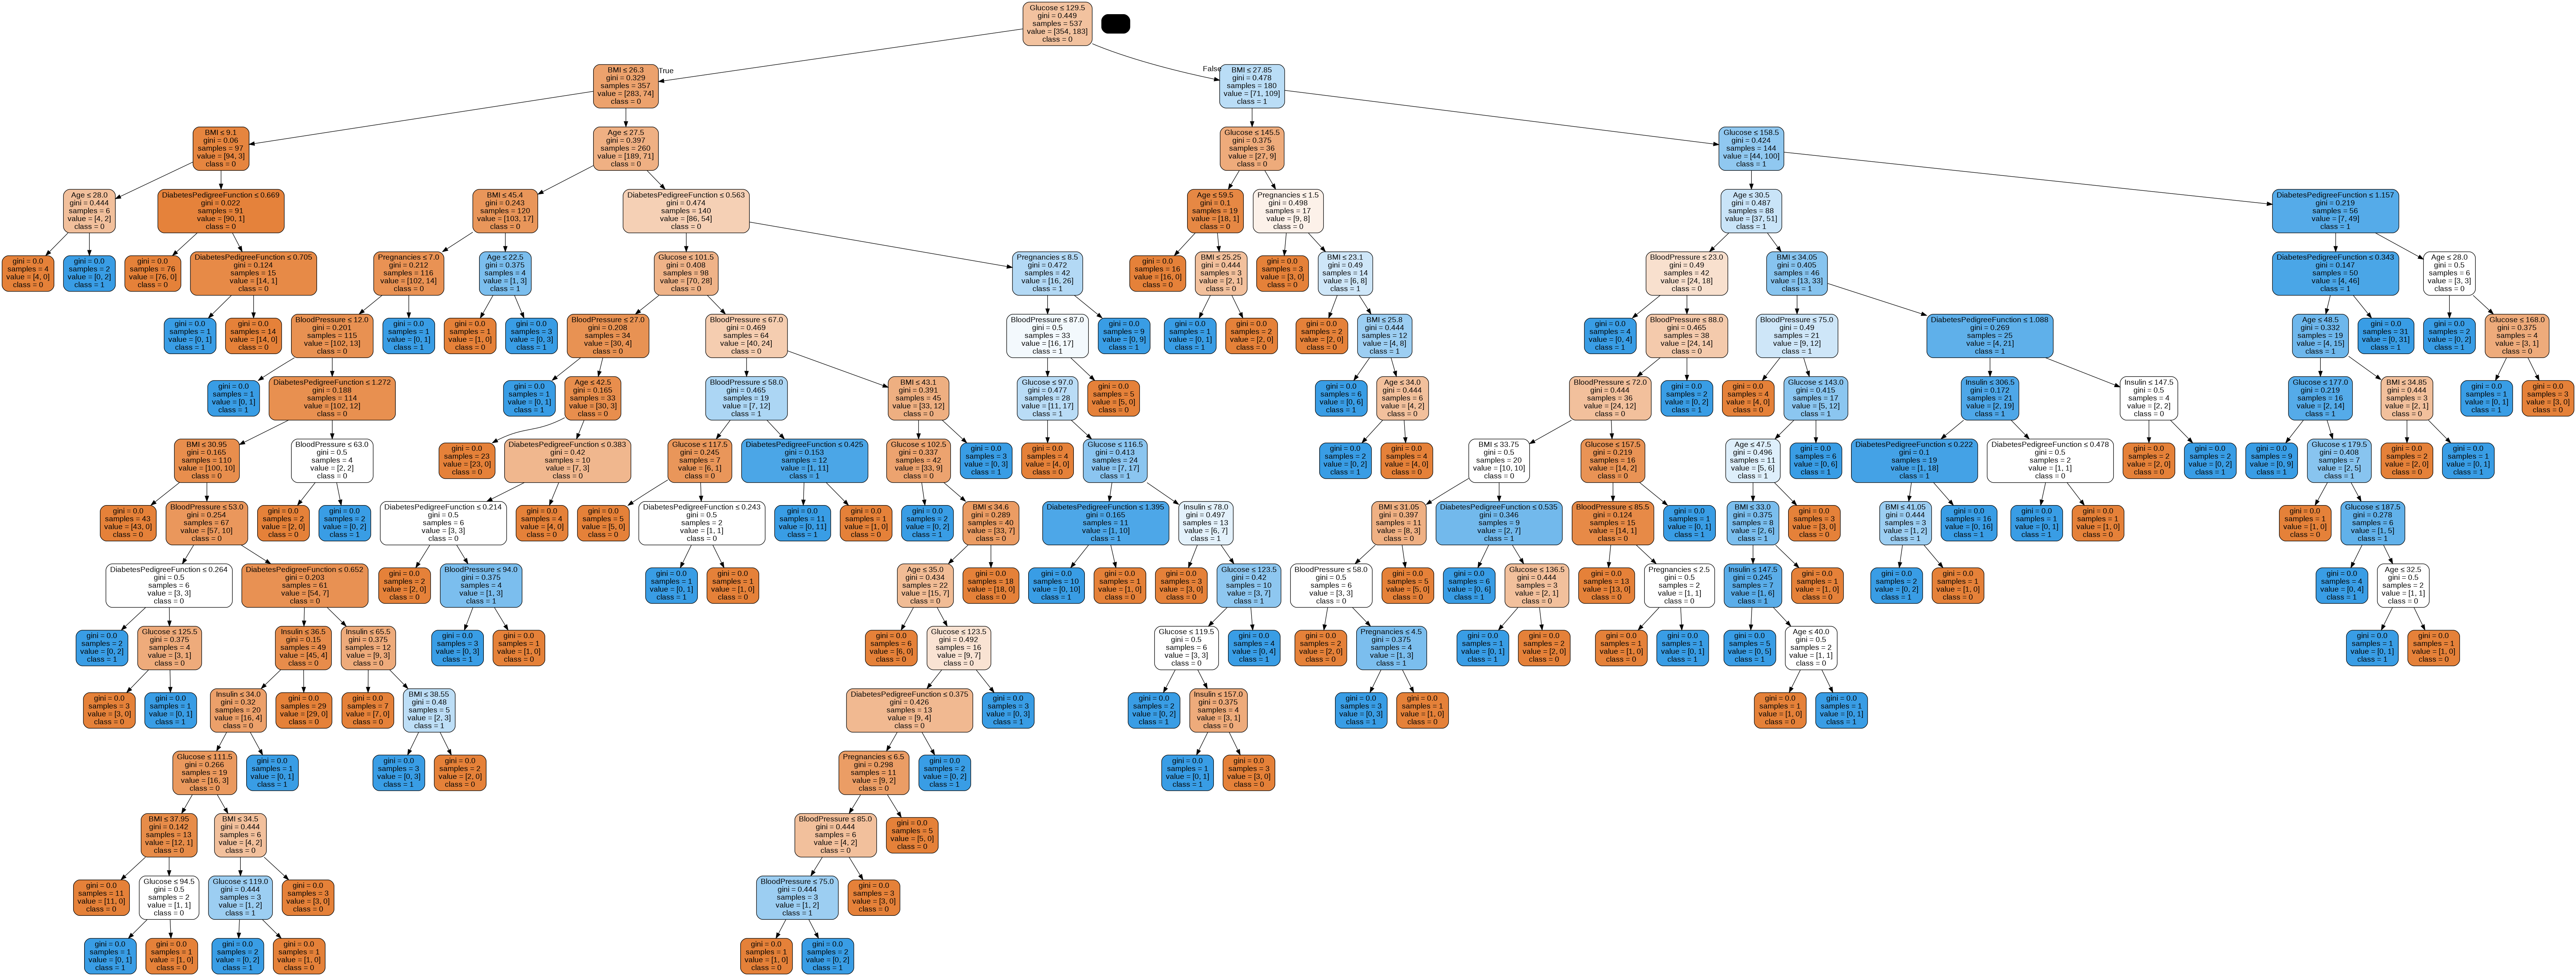

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Pada bagan Decision Tree, setiap simpul internal memiliki aturan keputusan yang memisahkan data. Gini disebut sebagai rasio Gini, yang mengukur ketidakmurnian node. Anda dapat mengatakan sebuah simpul murni ketika semua catatannya termasuk dalam kelas yang sama, seperti simpul yang dikenal sebagai simpul daun.

Di sini, pohon yang dihasilkan tidak dipangkas. Pohon yang tidak dipangkas ini tidak dapat dijelaskan dan tidak mudah dimengerti. Maka perlu adanya pengoptimalan dengan memangkas.



##Pengoptimalan Kinerja Decision Tree

Dalam Scikit-learn, optimasi dari decision tree classifier hanya dilakukan dengan pre-pruning. Kedalaman maksimum pohon dapat digunakan sebagai variabel kontrol untuk pra-pemangkasan. Dalam contoh berikut, Anda dapat memplot Decision Tree pada data yang sama dengan max_depth=3. Selain parameter pra-pemangkasan, Anda juga dapat mencoba ukuran pemilihan atribut lainnya seperti entropi.

In [ ]:
# Membuat objek Decision Tree classifer 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Pengklasifikasi Decision Tree 
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


###Visualisasi Decision Tree

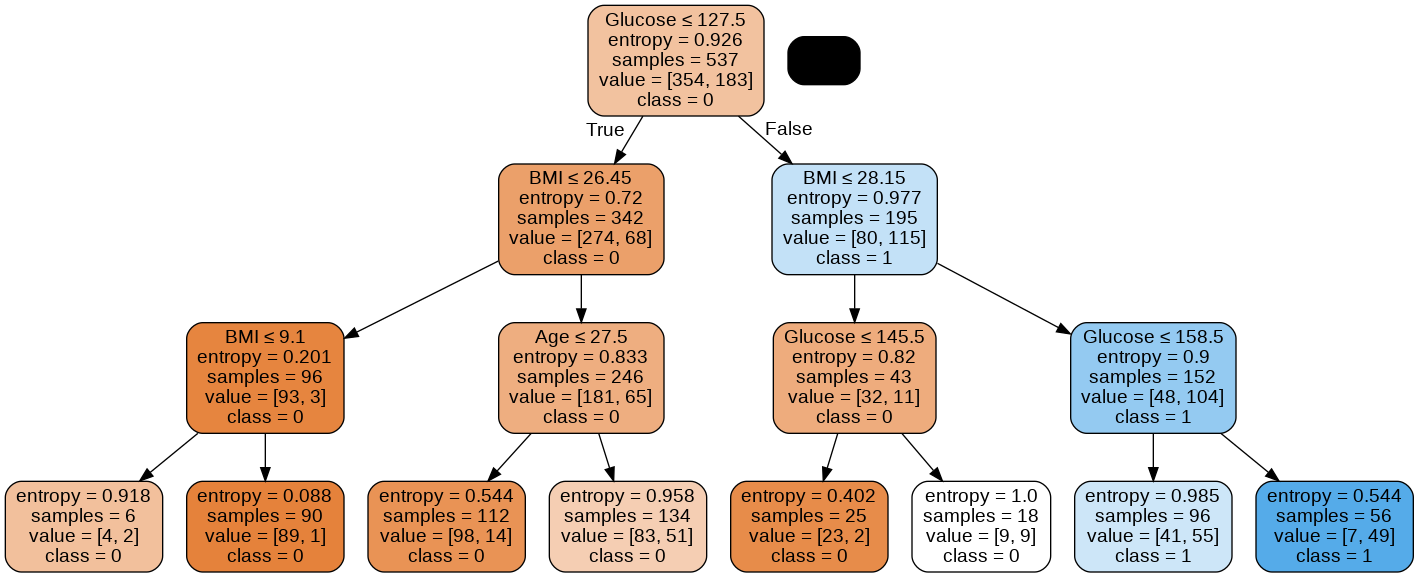

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Model yang dipangkas ini kurang kompleks, dapat dijelaskan, dan mudah dipahami daripada plot model pohon keputusan sebelumnya.